# **USING DENTAL METRICS TO PREDICT GENDER**

The aim of this project is to analyze dental data to predict an individual's gender based on specific dental features. This endeavor integrates the fields of dentistry, data science, and machine learning to explore the correlations between dental characteristics and gender, ultimately developing a predictive model.


#### Introduction and Background

Dental anthropology has long studied the relationship between dental features and various demographic factors, including gender. Previous research indicates that certain dental characteristics, such as tooth size, shape, and wear patterns, exhibit sexually dimorphic traits. Leveraging these insights, this project seeks to apply modern data analysis and machine learning techniques to predict gender from dental features with high accuracy.


#### Data Collection and Preprocessing

The initial phase of the project involves the collection of a comprehensive dataset containing dental records. These records include measurements of teeth dimensions, morphology, dental arch form, and other relevant features. The dataset also contains the gender of the individuals, serving as the target variable for the predictive model.

Data preprocessing is a critical step to ensure the quality and reliability of the dataset. This process includes:

1. **Data Cleaning**: Handling missing values, correcting inconsistencies, and removing any outliers that could skew the analysis.
2. **Feature Engineering**: Creating new features from existing data to enhance the model's predictive power. For example, calculating ratios or differences between certain measurements.
3. **Normalization and Scaling**: Standardizing the data to ensure that features with different scales do not disproportionately influence the model.


#### Exploratory Data Analysis (EDA)

EDA involves a thorough examination of the dataset to uncover patterns, trends, and relationships between dental features and gender. Visualizations such as histograms, scatter plots, and box plots help in understanding the distribution of features and identifying any significant differences between genders. Statistical tests are also conducted to quantify these differences.


#### Model Development

The core of the project is the development of a machine learning model to predict gender based on dental features. Several algorithms are considered, including:

1. **Logistic Regression**
2. **Decision Trees**
3. **Random Forests**
4. **XG Boost Classifier**

The dataset is split into training and testing sets to evaluate the models' performance. Cross-validation is employed to ensure that the model generalizes well to unseen data.


#### Model Evaluation and Interpretation

The performance of the predictive models is assessed using accuracy metrics. Confusion matrices provide additional insights into the models' ability to distinguish between genders.



#### Conclusion and Future Work

The project aims to establish a robust methodology for predicting gender based on dental features, contributing to both academic research and practical applications in fields such as forensic science and archaeology. Future work may involve expanding the dataset to include a more diverse population, exploring additional dental features, and refining the model to improve its accuracy and generalizability.

By integrating dental anthropology with advanced data science techniques, this project paves the way for innovative approaches to understanding the complex interplay between biology and gender, ultimately enhancing our ability to make accurate and meaningful predictions from dental data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [ ]:
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/Dentistry Dataset.csv')

In [ ]:
data.head(20)

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
5,6,NaN,25,Female,24.40,24.42,6.20,6.20,6.23,6.23,0.254,0.254,0.255,0.255
6,7,NaN,21,Female,28.10,28.12,6.48,6.48,6.84,6.84,0.230,0.230,0.243,0.243
7,8,NaN,18,Female,24.24,24.23,6.15,6.15,6.18,6.15,0.253,0.252,0.254,0.253
8,9,NaN,18,Female,25.95,25.95,6.74,6.78,6.74,6.74,0.259,0.261,0.259,0.259
9,10,NaN,25,Female,23.81,23.81,6.24,6.24,6.26,6.25,0.262,0.262,0.262,0.262


In [ ]:
#Data Preprocessing
#checking null values
data.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [ ]:
data.describe()

,Sl No,Sample ID,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,NaN,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1100.000000,NaN,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


<Axes: xlabel='inter canine distance intraoral', ylabel='intercanine distance casts'>

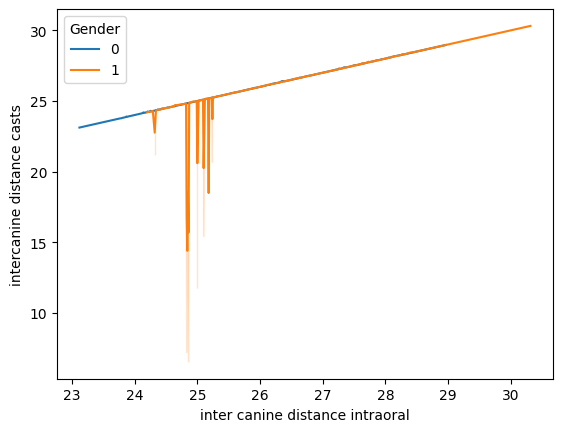

In [ ]:
#visualizing intercanine distance data
#sns.lineplot(data['inter canine distance intraoral'], data['intercanine distance casts'], hue=data["Gender"])
sns.lineplot(x='inter canine distance intraoral', y='intercanine distance casts', hue='Gender', data=data)

<Axes: xlabel='right canine width intraoral', ylabel='right canine width casts'>

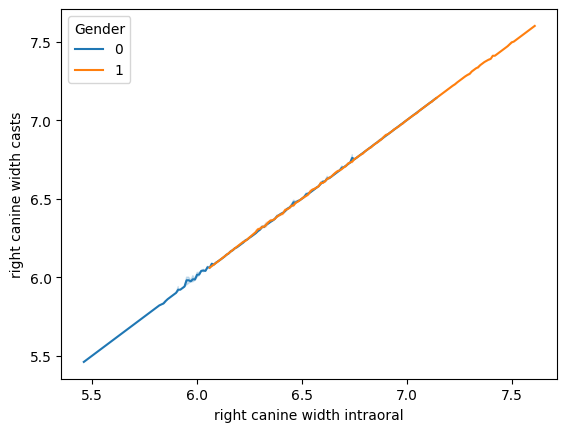

In [ ]:
sns.lineplot(x='right canine width intraoral', y='right canine width casts', hue='Gender', data=data)

<Axes: xlabel='left canine width intraoral', ylabel='left canine width casts'>

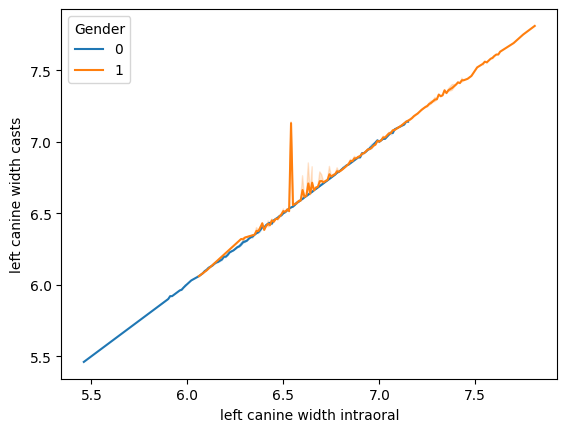

In [ ]:
sns.lineplot(x='left canine width intraoral', y='left canine width casts', hue='Gender', data=data)

<Axes: xlabel='right canine index intra oral', ylabel='right canine index casts'>

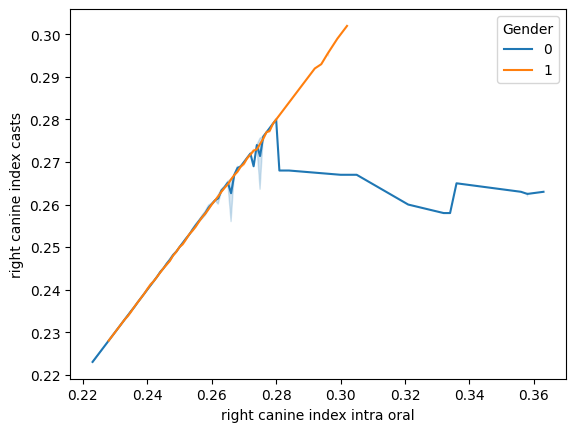

In [ ]:
sns.lineplot(x='right canine index intra oral', y='right canine index casts', hue='Gender', data=data)

<Axes: xlabel='left canine index intraoral', ylabel='left canine index casts'>

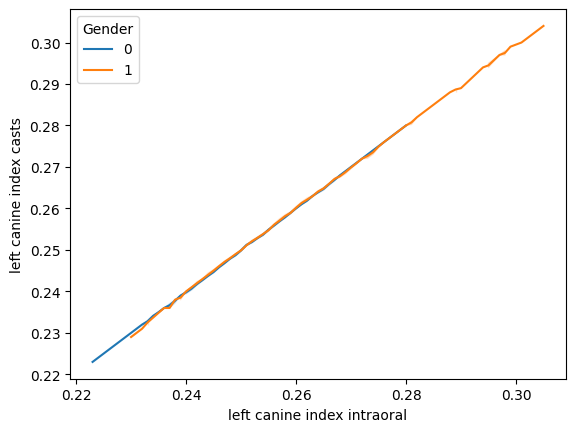

In [ ]:
sns.lineplot(x='left canine index intraoral', y='left canine index casts', hue='Gender', data=data)

In [ ]:
#encoding the data of Gender from categorical to numerical
twogender = {'Female':0, 'Male':1}
data['Gender'] = data['Gender'].map(twogender)

In [ ]:
data.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [ ]:
X = data.drop(['Gender','Sample ID'], axis=1)
y = data['Gender']

In [ ]:
X

,Sl No,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,24,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,22,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,25,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,21,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1095    1
1096    1
1097    1
1098    1
1099    1
Name: Gender, Length: 1100, dtype: int64

In [ ]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(770, 12)
(330, 12)
(770,)
(330,)


# **Trying Diffrent Methods to find the best accuracy**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_val)
dt_acc=accuracy_score(y_val, y_pred)
#print(accuracy_score(y_val, y_pred))
print('Accuracy of Decision Tree is: {:.2f}%'.format(dt_acc*100))


Accuracy of Decision Tree is: 100.00%


In [ ]:
#random forest Classifier
rf = RandomForestClassifier(random_state =0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, rf_pred)
print('Accuracy of Random Forest is: {:.2f}%'.format(rf_acc*100))

Accuracy of Random Forest is: 97.58%


In [ ]:
#logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)
lr_acc = accuracy_score(y_val, lr_pred)
print('Accuracy of Logistic Regression is: {:.2f}%'.format(lr_acc*100))


Accuracy of Logistic Regression is: 91.52%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_val)
clf_acc = accuracy_score(y_val, clf_pred)
print('Accuracy of Gradient Boosting Classifier is: {:.2f}%'.format(clf_acc*100))

Accuracy of Gradient Boosting Classifier is: 100.00%


# Accuracy of Decision Tree is: 100.00%

# Accuracy of Random Forest is: 97.58%

# Accuracy of Logistic Regression is: 91.52%

# Accuracy of Gradient Boosting Classifier is: 100.00%